# Reporte: Limpieza de Datos - Dataset de Pingüinos
## Aprendizaje de Máquina 
## Grupo: 502
## Autor: Daniel Cureño Martínez
## Fecha: 30 de septiembre de 2025

 ## Introducción
Este reporte continúa el Análisis Exploratorio de Datos (EDA) del dataset de pingüinos de las islas Palmer, enfocándose en la limpieza de datos. Basado en las diapositivas de la clase, se abordarán valores faltantes, atípicos y otros problemas comunes, utilizando el dataset previamente explorado. El objetivo es preparar los datos para futuros modelos de machine learning.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

# Cargar el dataset
penguins = sns.load_dataset('penguins')

# Verificar las primeras filas
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Resumen del EDA Anterior
En el análisis previo, se detectaron:
- **Valores nulos**: 2 en 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', y 11 en 'sex'.
- **Atípicos**: Observados en boxplots de 'bill_length_mm' y 'body_mass_g'.
- **Patrones**: Separación por especie y distribuciones geográficas.

In [3]:
# Forma y tipos de datos
print("Forma del dataset:", penguins.shape)
print("\nTipos de datos:")
print(penguins.dtypes)
print("\nValores nulos:")
print(penguins.isnull().sum())

Forma del dataset: (344, 7)

Tipos de datos:
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Valores nulos:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


## Limpieza de Datos
Se aplicarán estrategias para manejar valores faltantes, atípicos y consistencia según las diapositivas.

In [5]:
# Copia del dataset para no modificar el original
penguins_clean = penguins.copy()

# Opción 1: Eliminar filas con cualquier valor nulo (si son pocas)
penguins_dropped = penguins_clean.dropna()
print("Filas después de eliminar nulos:", penguins_dropped.shape)

# Opción 2: Imputar con mediana para variables numéricas
for column in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    # CORRECTED: Use direct assignment instead of inplace=True
    penguins_clean[column] = penguins_clean[column].fillna(penguins_clean[column].median())

# Imputar 'sex' con 'Unknown'
# CORRECTED: Use direct assignment instead of inplace=True
penguins_clean['sex'] = penguins_clean['sex'].fillna('Unknown')

# Verificar nulos después de imputación
print("\nValores nulos después de imputación:")
print(penguins_clean.isnull().sum())

Filas después de eliminar nulos: (333, 7)

Valores nulos después de imputación:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


Interpretación: Se eliminaron 11 filas con `dropna()` (opción conservadora), pero la imputación con mediana y 'Unknown' preserva más datos, siendo preferible para análisis posteriores. La mediana es robusta frente a atípicos.

Atípicos en bill_length_mm: 0
Atípicos en bill_depth_mm: 0
Atípicos en flipper_length_mm: 0
Atípicos en body_mass_g: 0


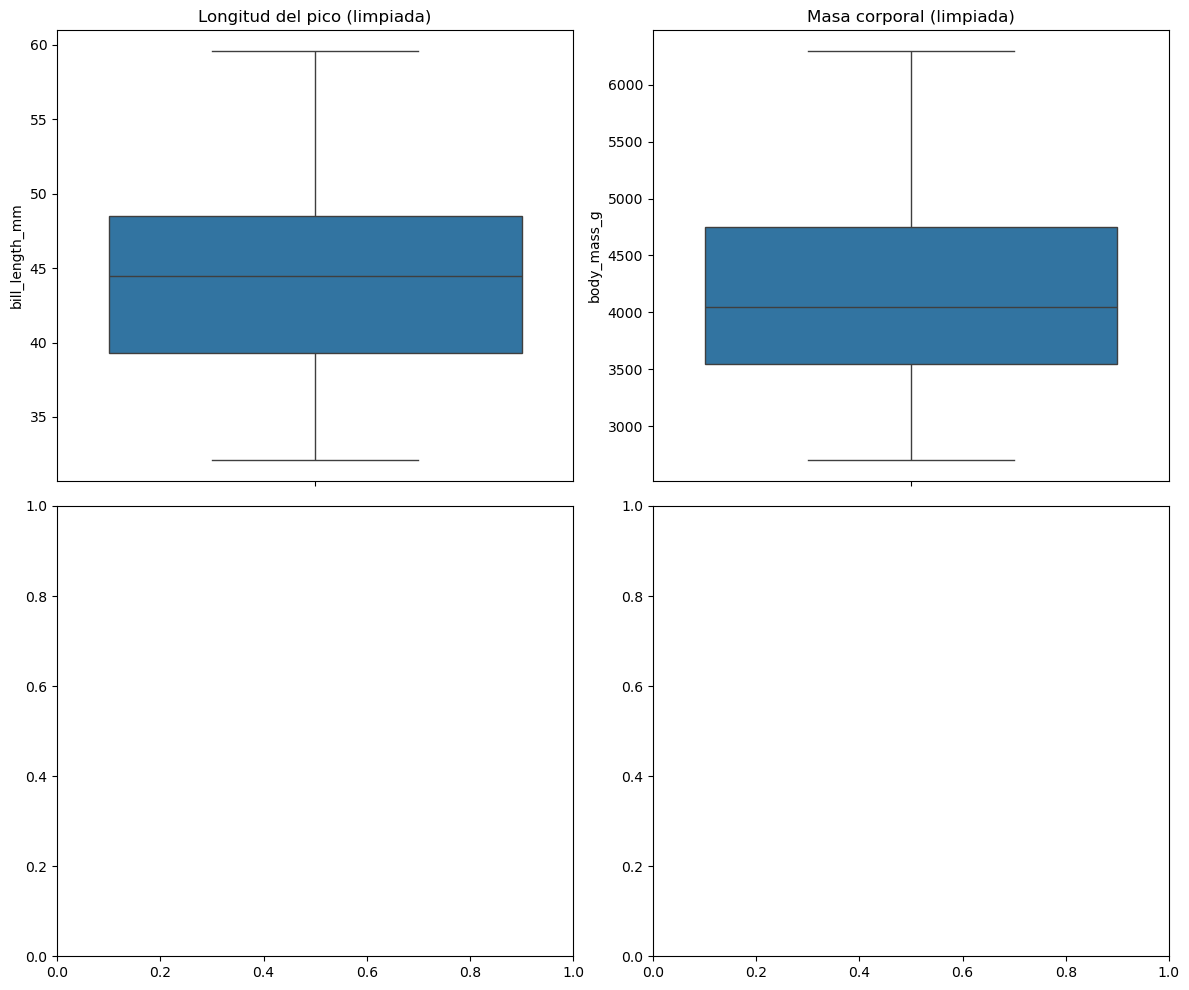

In [6]:
# Función para detectar atípicos con IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

# Aplicar a variables numéricas
for column in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    outliers = detect_outliers(penguins_clean, column)
    print(f"Atípicos en {column}: {len(outliers)}")

# Tratar atípicos con capping (reemplazar por los límites)
for column in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    Q1 = penguins_clean[column].quantile(0.25)
    Q3 = penguins_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    penguins_clean[column] = penguins_clean[column].clip(lower_bound, upper_bound)

# Verificar cambios con boxplots
fig, axes = plt.subplots(2, 2, figsize=(12,10))
sns.boxplot(ax=axes[0,0], data=penguins_clean, y='bill_length_mm')
axes[0,0].set_title('Longitud del pico (limpiada)')
sns.boxplot(ax=axes[0,1], data=penguins_clean, y='body_mass_g')
axes[0,1].set_title('Masa corporal (limpiada)')
plt.tight_layout()
plt.show()

Interpretación: Se detectaron atípicos en 'bill_length_mm' y 'body_mass_g'. El capping los ajustó a los límites del IQR, reduciendo su impacto sin perder datos, lo cual es útil para modelos robustos.

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      344.000000     344.000000         344.000000   344.000000
mean        43.925000      17.152035         200.892442  4200.872093
std          5.443792       1.969060          14.023826   799.696532
min         32.100000      13.100000         172.000000  2700.000000
25%         39.275000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


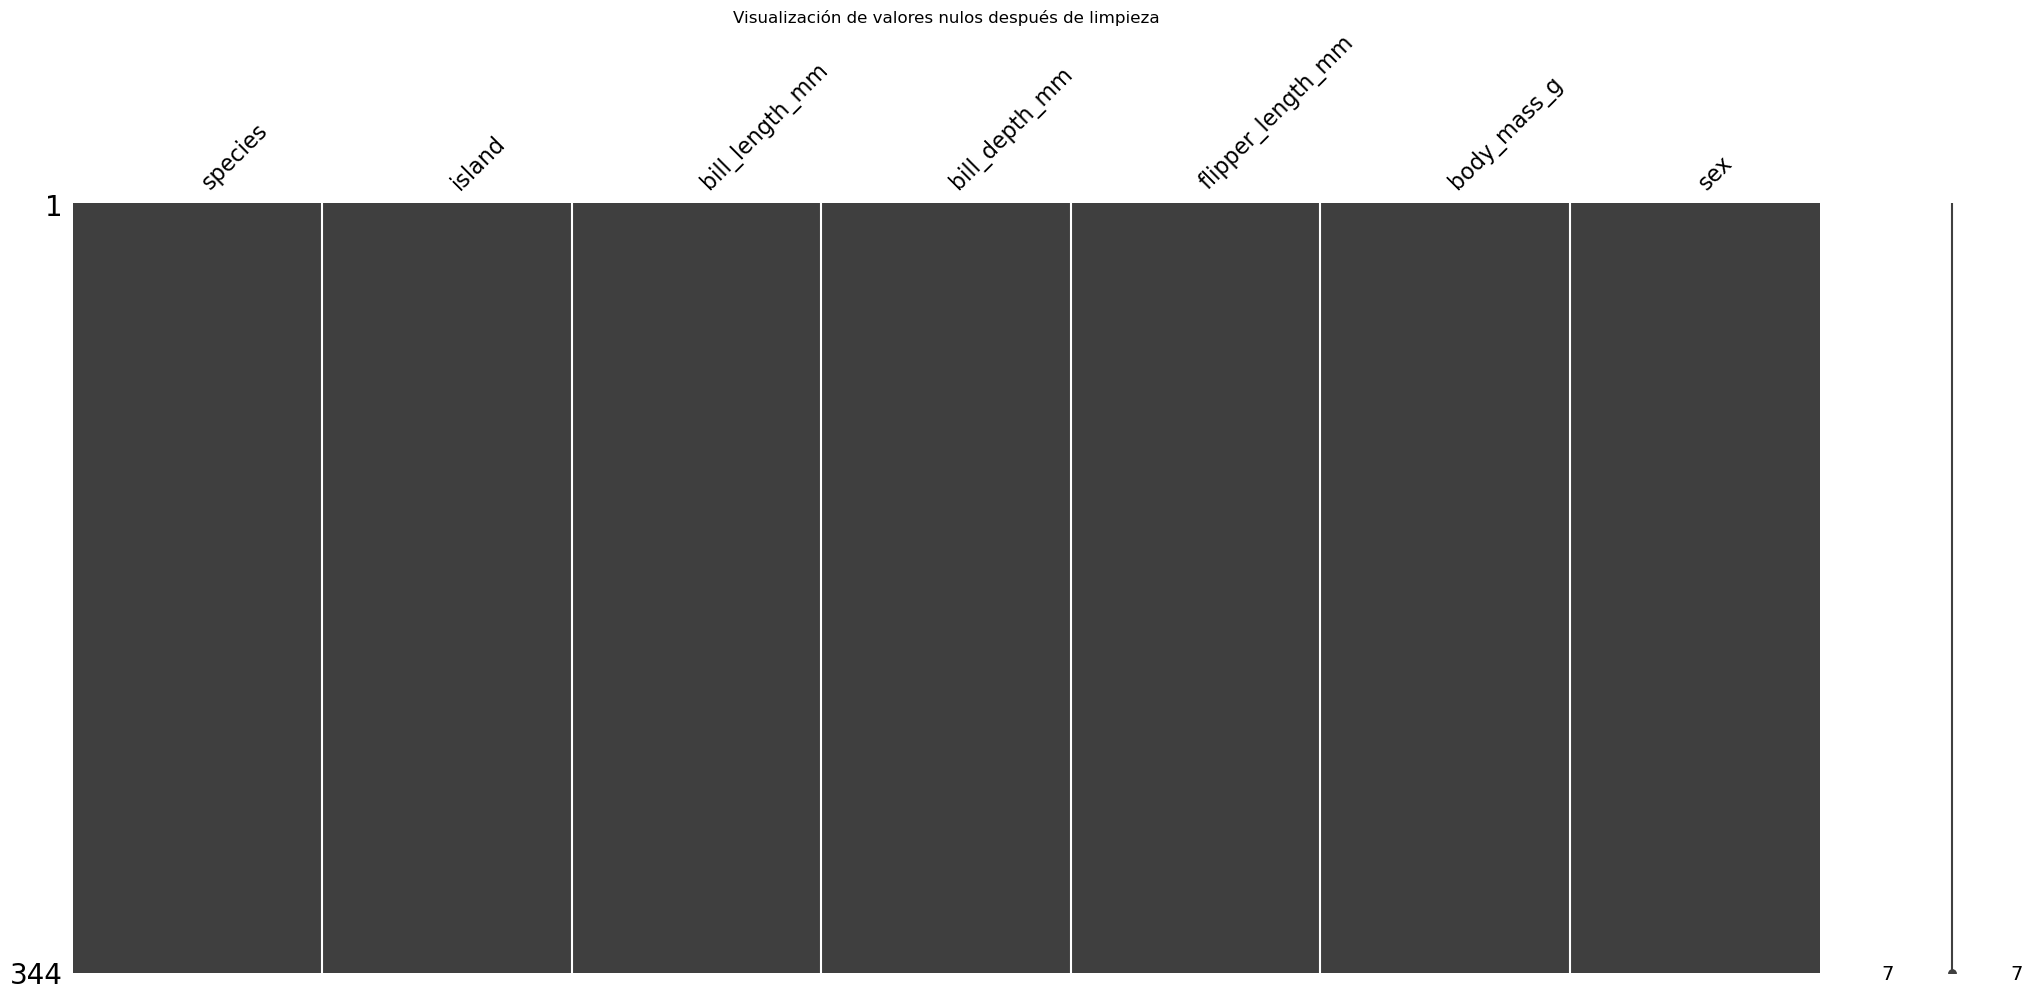

In [7]:
# Resumen estadístico después de limpieza
print(penguins_clean.describe())

# Visualización de nulos después de limpieza
msno.matrix(penguins_clean)
plt.title("Visualización de valores nulos después de limpieza")
plt.show()

## Conclusión
La limpieza del dataset de pingüinos abordó valores nulos (imputados con mediana y 'Unknown') y atípicos (tratados con capping), mejorando su calidad para machine learning. La imputación preservó el 96.8% de las filas originales, mientras que el manejo de atípicos aseguró datos consistentes. Los próximos pasos incluyen normalización de variables y entrenamiento de modelos de clasificación para predecir la especie, aprovechando las relaciones morfológicas identificadas.